In [ ]:
import os
os.makedirs("pboc", exist_ok=True)

In [ ]:
!mv cbbtn_utilities.py pboc/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pboc import cbbtn_utilities as cb
sns.set_context('talk')
sns.set()
%matplotlib inline

In [ ]:
def master_equation(prob, k, dt):
    """
    Computes the master equation for diffusion in one dimension.

    Parameters
    ----------
    prob : 2d-array
        Array in which the probabiilities will be stored. This should be in
        the shape of N boxes by m time points. This should have a preset initial
        condition.
    k : float
        Jump rate of particles between boxes in units of 1/s.
    dt : float
        Time step for our integration. This should be in units of seconds and
        should be sufficiently smaller than our jump rate for numerical stability.

    Returns
    -------
    prob: 2d-array
        The probability vector given to the function where each element now
        contains a computed probability.
    """

    # We'll first figure out the total number of boxes and the number
    # of time steps we will integrate over. This will essentially be the
    # shape of our prob array.
    num_boxes, time_points = np.shape(prob)

    # We need to integrate over each time step. Since we have the initial
    # condition  set, we can start at time step '2' which is 1 in Python.
    for t in range(1, time_points):
        # Now we will need to deal with the boundary conditions. If we are
        # at box 0, we can't deal with box -1. Likewise, if we are in the
        # final box, we can't deal with box +1. There are more clever
        # ways we could deal with this, but for right now we can just compute
        # these two cases explicity.
        prob[0, t] = prob[0, t-1] + k * dt * prob[1, t-1] - k * dt * prob[0, t-1]

        # Identify the index of the last box.
        last_box = num_boxes - 1
        prob[last_box, t] = prob[last_box, t-1] + \
                                k * dt * prob[last_box-1, t-1] -\
                                k * dt * prob[last_box, t-1]

        # With the boundary conditions in place, we can now iterate over
        # all other boxes and repeat this procedure.
        for box in range(1, num_boxes - 1):
            prob[box, t] = prob[box, t-1] + k * dt * prob[box-1, t-1] +\
                           k * dt * prob[box+1, t-1] -\
                           2 * k * dt * prob[box, t-1]

    # Now we've integrated over all time steps for each box and can just
    # return our array
    return prob

In [ ]:
# Define the parameters.
k = 5  # Jump  frequency in inverse seconds.
dt = 1 / 50  # Time step sufficiently smaller than the jump frequency.
num_boxes = 80  # The total number of boxes
time_steps = 100  # Total time of the integration in units of seconds.

In [ ]:
# Set up the probability array and set the initial condition
prob = np.zeros((num_boxes, time_steps))

# The intial condition will be a delta function in the middle of our box.
initial_position = int(num_boxes/ 2) - 1  # -1 for indexing at 0.
prob[initial_position, 0] = 1.0

In [ ]:
# Execute the integration
prob = master_equation(prob, k, dt)

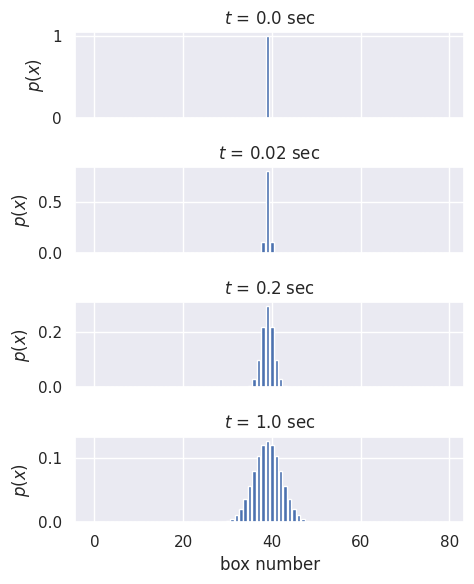

In [ ]:
# Determine the number of time points.
time_points = [0, 1,10, 50]

# Define the array of boxes.
bins = np.arange(0, num_boxes, 1)

# Set up the figure. This will return the same number of axes as we
# have time points.
fig, ax = plt.subplots(nrows=len(time_points), ncols=1, sharex=True,
                      figsize=(5, 6))

# Loop through the time points and make the bar plot.
for i in range(len(time_points)):
    ax[i].bar(bins, prob[:, time_points[i]])

    # Set a title so we know the time point and convert it to seconds.
    ax[i].set_title('$t$ = %s sec' %(time_points[i] * dt))
    ax[i].set_ylabel('$p(x)$')

# Add an xlabel and clean up the plot.
ax[-1].set_xlabel('box number')

# This command will automatically adjust the spacing between plots to make things
# more aesthetically pleasing.
plt.tight_layout()

(<Figure size 1000x800 with 1 Axes>,
 <Axes3D: xlabel='position', ylabel='time [sec]', zlabel='probability'>)

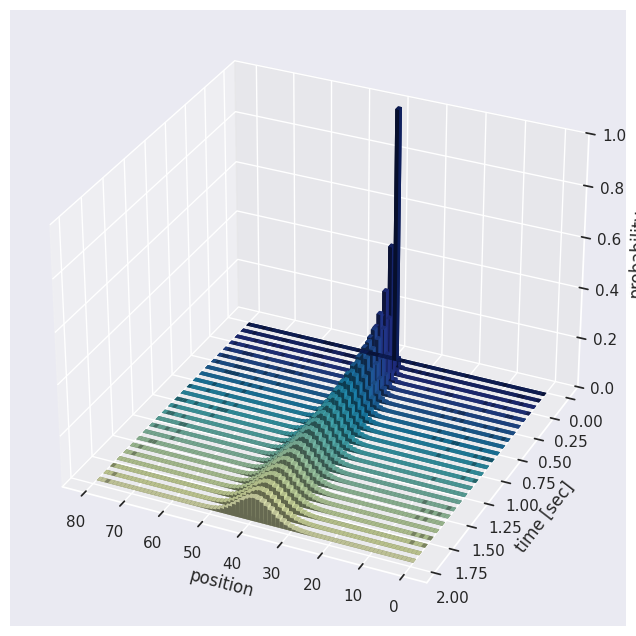

In [ ]:
# Generate the 3D bar plot.
cb.bar_plot(prob, 25, dx=1, dy=dt, x_label='position',
            y_label='time [sec]', z_label='probability')

(<Figure size 1000x800 with 1 Axes>,
 <Axes3D: xlabel='position', ylabel='time [sec]', zlabel='probability'>)

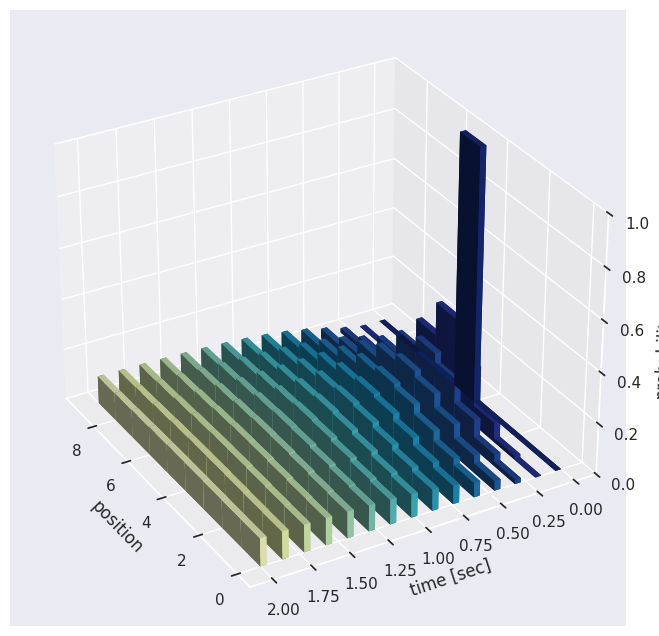

In [ ]:
# Set the new box size and set the initial position.
num_boxes = 9
prob = np.zeros((num_boxes, time_steps))
prob[4, 0] = 1.0

# Run the integration in our new narrow box.
prob = master_equation(prob, k, dt)

# Generate the bar plot.
cb.bar_plot(prob, 14, dx=1, dy=dt, x_label='position',
            y_label='time [sec]', z_label='probability',
            azim_angle=150)

(<Figure size 1000x800 with 1 Axes>,
 <Axes3D: xlabel='position', ylabel='time [sec]', zlabel='probability'>)

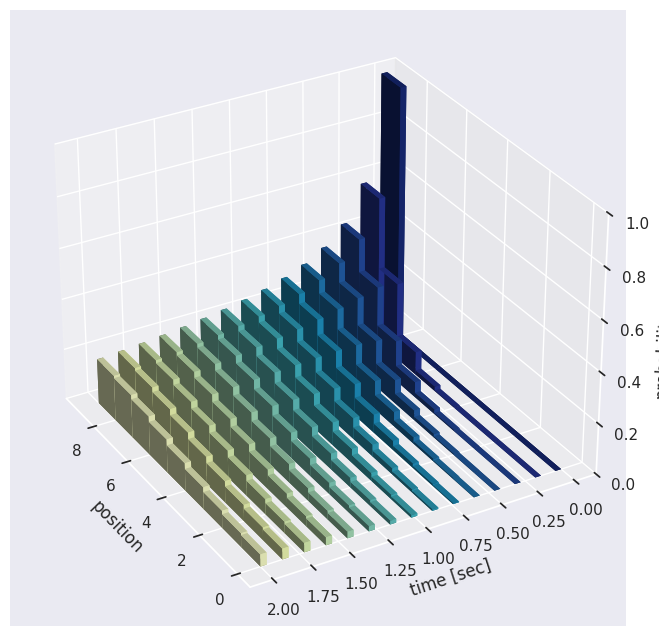

In [ ]:
# Reset the box size and probability matrix
num_boxes = 9
prob = np.zeros((num_boxes, time_steps))

# Set the new initial position
prob[-1, 0] = 1.0

# Run the integration with our new initial position
prob = master_equation(prob, k, dt)

# Generate the bar plot.
cb.bar_plot(prob, 14, dx=1, dy=dt, x_label='position',
            y_label='time [sec]', z_label='probability',
            azim_angle=150)

In [ ]:
# Set the box dimensions
num_boxes = 20
time_steps = 500
prob = np.zeros((num_boxes, time_steps))

# Set the initial condition. We'll leave 6 boxes in the middle empty
bleach_size = 6
prob[:,0] = 1 / (num_boxes - bleach_size)

# Set the region where we bleached equal to zero.
prob[7:13, 0] = 0

# Integrate!
prob = master_equation(prob, k, dt)

(<Figure size 1000x800 with 1 Axes>,
 <Axes3D: xlabel='position', ylabel='time [sec]', zlabel='probability'>)

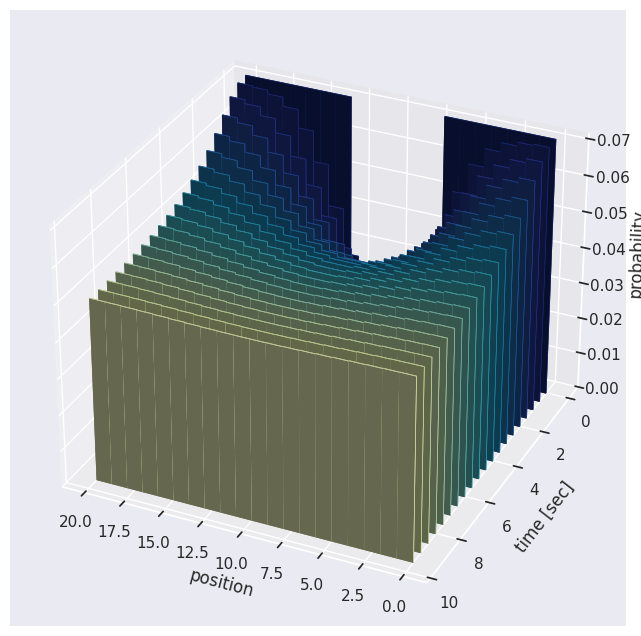

In [ ]:
cb.bar_plot(prob, 20, dx=1, dy=dt, x_label='position',
            y_label='time [sec]', z_label='probability')
